## Setting up paths and installations

In [1]:
!pip install tensorflow==2.4.0 tensorflow-gpu==2.4.0

In [2]:
from google.colab import drive
drive.mount('drive')
%cd /content/drive/MyDrive/TensorflowDrive

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
/content/drive/MyDrive/TensorflowDrive


# **setting up required paths for my_ssd_resnet_v1_fpn model**


In [4]:
customModelName = 'my_ssd_resnet_v1_fpn' 
pretrainedModelName = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
pretrainedModelUrl = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TfRecordScriptName = 'generate_tfrecord.py'
LabelmapName = 'label_map.pbtxt'

In [5]:
drivePaths = {
    'mainModel':'/content/drive/MyDrive/TensorflowDrive/models',
    'scripts': '/content/drive/MyDrive/TensorflowDrive/scripts',
    'workspace':"/content/drive/MyDrive/TensorflowDrive/workspace",
    'annotations': '/content/drive/MyDrive/TensorflowDrive/workspace/annotations',
    'images': '/content/drive/MyDrive/TensorflowDrive/workspace/images',
    'model':'/content/drive/MyDrive/TensorflowDrive/workspace/models',
    'pretrained_model': "/content/drive/MyDrive/TensorflowDrive/workspace/pretrained-models",
    'checkpoint': '/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_resnet_v1_fpn',
}

# **setting paths for my_ssd_mobnet**

In [6]:
customModelName = 'my_ssd_mobnet' 
pretrainedModelName = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrainedModelUrl = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TfRecordScriptName = 'generate_tfrecord.py'
LabelmapName = 'label_map.pbtxt'

In [5]:
drivePaths = {
    'mainModel':'/content/drive/MyDrive/TensorflowDrive/models',
    'scripts': '/content/drive/MyDrive/TensorflowDrive/scripts',
    'workspace':"/content/drive/MyDrive/TensorflowDrive/workspace",
    'annotations': '/content/drive/MyDrive/TensorflowDrive/workspace/annotations',
    'images': '/content/drive/MyDrive/TensorflowDrive/workspace/images',
    'model':'/content/drive/MyDrive/TensorflowDrive/workspace/models',
    'pretrained_model': "/content/drive/MyDrive/TensorflowDrive/workspace/pretrained-models",
    'checkpoint': '/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_mobnet',
}

# **Common files**

In [7]:
import os

In [8]:
driveFiles ={
    'pipelineConfig': os.path.join(drivePaths['model'],customModelName,'pipeline.config'),
    'TfRecordScript': os.path.join(drivePaths['scripts'], TfRecordScriptName),
    'LabelMap': os.path.join(drivePaths['annotations'], LabelmapName)
}

# **Installing required modules**

In [8]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis
!pip install apache-beam[gcp]
!pip install avro-python3==1.9.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

  Created wheel for avro-python3: filename=avro_python3-1.9.1-py3-none-any.whl size=43202 sha256=f503dab0d2d8291fdf9fc6667d6caefe41794c1dc6b519260638d9476370c2ba
  Stored in directory: /root/.cache/pip/wheels/4e/8d/91/77b0b802e4cf8a342359b48d5f1a836b4dbc8a8f6f8c309957
Successfully built avro-python3
  Attempting uninstall: avro-python3
    Found existing installation: avro-python3 1.9.2.1
    Uninstalling avro-python3-1.9.2.1:
      Successfully uninstalled avro-python3-1.9.2.1


In [9]:
%cd '/content/drive/MyDrive/TensorflowDrive/models/research'
!protoc object_detection/protos/*.proto --python_out=.

/content/drive/MyDrive/TensorflowDrive/models/research


# **creating enviroment**

In [10]:
import sys
os.environ['PYTHONPATH']+=":/content/drive/MyDrive/TensorflowDrive/models"
sys.path.append("/content/drive/MyDrive/TensorflowDrive/models/research")

# **Build and Install setup.py**

In [11]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/fpn_pb2.py -> build/lib/object_detection/

# **verifying installations**

In [ ]:
%cd /content/drive/MyDrive/TensorflowDrive/models/research/object_detection/builders
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/drive/MyDrive/TensorflowDrive/models/research/object_detection/builders
2021-12-01 09:51:22.913908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-01 09:51:31.399239: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-01 09:51:31.400283: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-01 09:51:31.467866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 09:51:31.468725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 com

# **first dataset(jpg format) and generating tf record**

In [ ]:
trainImages = os.path.join(drivePaths['images'],'train')
testImages = os.path.join(drivePaths['images'],'test')
trainRecord = os.path.join(drivePaths['annotations'], 'train.record')
testRecord = os.path.join(drivePaths['annotations'], 'test.record')

In [ ]:
!python {driveFiles['TfRecordScript']} -x {trainImages} -l {driveFiles['LabelMap']} -o {trainRecord}
!python {driveFiles['TfRecordScript']} -x {testImages} -l {driveFiles['LabelMap']} -o {testRecord}

Successfully created the TFRecord file: /content/drive/MyDrive/TensorflowDrive/workspace/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/TensorflowDrive/workspace/annotations/test.record


# **second dataset(png format) and changed tf generated script**

In [ ]:
#from a diffrent drive directory
pngTrainImages = '/content/drive/MyDrive/Tensorflow/workspace/images/train'
pngTestImages = '/content/drive/MyDrive/Tensorflow/workspace/images/test'
tfRecordScript = '/content/drive/MyDrive/Tensorflow/scripts/generate_tfrecord.py'

!python {tfRecordScript} -x {pngTrainImages} -l {driveFiles['LabelMap']} -o {trainRecord}
!python {tfRecordScript} -x {pngTestImages} -l {driveFiles['LabelMap']} -o {testRecord}



Successfully created the TFRecord file: /content/drive/MyDrive/TensorflowDrive/workspace/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/TensorflowDrive/workspace/annotations/test.record


In [ ]:
trainingScript = '/content/drive/MyDrive/TensorflowDrive/models/research/object_detection/model_main_tf2.py'
exportingScript = '/content/drive/MyDrive/TensorflowDrive/models/research/object_detection/exporter_main_v2.py'

### **configure the pipeline.config file for my_ssd_mobnet**



## **model training**

In [ ]:
#cd into training_demo
#start the Tensorboard
%cd drivePaths['workspace']
%load_ext tensorboard
%tensorboard --logdir=os.path.join(drivePaths['models'],customModelName)# %load_ext tensorboard
# %tensorboard --logdir=models/[name_of_pre-trained-model_you_downloaded]

In [ ]:
!python {trainingScript} --model_dir='/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_resnet_v1_fpn' --pipeline_config_path='/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_resnet_v1_fpn/pipeline.config' --num_train_steps=10000

2021-11-26 07:38:39.687963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/usr/local/lib/python3.7/dist-packages/tensorflow_addons-0.15.0-py3.7-linux-x86_64.egg/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2021-11-26 07:38:43.609118: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating X

# **model training for ssd_mobilenet**

In [ ]:
!python {trainingScript} --model_dir='/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_mobnet' --pipeline_config_path='/content/drive/MyDrive/TensorflowDrive/workspace/models/my_ssd_mobnet/pipeline.config' --num_train_steps=10000

2021-11-26 07:41:01.729906: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/usr/local/lib/python3.7/dist-packages/tensorflow_addons-0.15.0-py3.7-linux-x86_64.egg/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2021-11-26 07:41:05.764089: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating X


**Check gpu cuda and cudnn if an error ocured in the above cell**

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!pip list


# **exporting the model**


In [ ]:
myModel = os.path.join(drivePaths['workspace'],'myModel')

In [ ]:
!python {exportingScript} --input_type image_tensor --pipeline_config_path {driveFiles['pipelineConfig']} --trained_checkpoint_dir {drivePaths['checkpoint']} --output_directory {myModel}

2021-11-25 13:11:12.768539: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-25 13:11:16.139634: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-25 13:11:16.140588: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-25 13:11:16.146552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 13:11:16.147119: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-11-25 13:11:16.147162: I tensorflow/stream_executor/platform/default/dso_lo



# **testing my model**

In [ ]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

savedModel = '/content/drive/MyDrive/TensorflowDrive/workspace/myModel/saved_model'
print('Loading model...', end='')
detect_fn=tf.saved_model.load(savedModel)
print('Done!')



Loading model...Done!



# ***Testing sdd-resnet model***



In [ ]:
category_index=label_map_util.create_category_index_from_labelmap(driveFiles['LabelMap'],use_display_name=True)

In [ ]:

testimagePath = '/content/drive/MyDrive/TensorflowDrive/workspace/images/test/5.jpg'

# **RUNNING TEST ON IMAGES**

Done


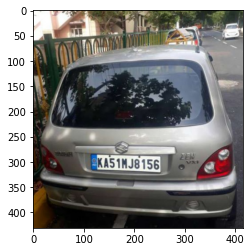

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

image_np = np.asarray(np.array(Image.open(testimagePath)))
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
input_tensor = input_tensor[:, :, :, :4] # <= add this line
detections = detect_fn(input_tensor)

num_detections=int(detections.pop('num_detections'))
detections={key:value[0,:num_detections].numpy()
                for key,value in detections.items()}
detections['num_detections']=num_detections
detections['detection_classes']=detections['detection_classes'].astype(np.int64)
image_np_with_detections=image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=5,     
          min_score_thresh=.5,      
          agnostic_mode=False)
%matplotlib inline
plt.figure()
plt.imshow(image_np_with_detections)
print('Done')
plt.show()

# **Tesing and configuration of ssd mobilenet model**

loading training model from checkpoint


In [12]:
%cd /content/drive/MyDrive/TensorflowDrive
!pwd
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util


/content/drive/MyDrive/TensorflowDrive
/content/drive/MyDrive/TensorflowDrive


ModuleNotFoundError: ignored

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(driveFiles['pipelineConfig'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(drivePaths['checkpoint'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

testing on images

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(driveFiles['LabelMap'])

In [ ]:
# IMAGE_PATH = '/content/drive/MyDrive/Tensorflow/workspace/images/test/Cars416.png'
IMAGE_PATH = '/content/drive/MyDrive/kenyan cars/images (6).jpeg'

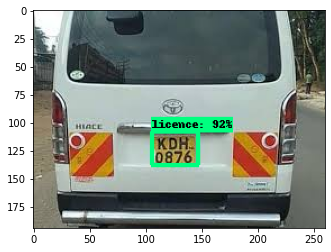

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# **using Optical Character Detection on an image**

In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 61 kB/s 


In [ ]:
import easyocr

In [ ]:
detection_threshold = 0.7

In [ ]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]


In [ ]:
width = image.shape[1]
height = image.shape[0]

[([[0, 2], [40, 2], [40, 29], [0, 29]], '081', 0.18569428619527356)]


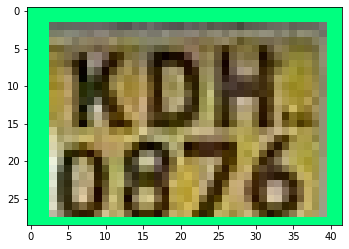

In [ ]:
for idx, box in enumerate(boxes):
    roi = box*[height,width, height,width]
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [ ]:
#offenders no sql database
platesList = {
    'kcb786w': {
          'offence':'overSpeeding' 
            },
    'kdd211': {
         'offence':'car stolen'   
            }
}

In [ ]:
import IPython

plates = (ocr_result[0][1]).split('.')
alphaCategory = plates[0].strip()
numCategory = plates[1].strip()

js_code = '''
    window.alert(vechicle is on the offenders list)
    '''

wholePlate = (alphaCategory+numCategory).lower()
if wholePlate in platesList:
    display(IPython.display.Javascript(js_code))
    offence = platesList[wholePlate]['offence']
    print((wholePlate.upper())+" is in offenders list for: "+offence)
else:
    print('vechicle is not found in offenders list')

NameError: ignored

# **detection from a live video**

**setup for webcam api**

In [ ]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Successfully uninstalled opencv-python-headless-4.5.4.60


In [ ]:
import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2

def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [ ]:

def js_reply_to_image(js_reply):
    """
    input: 
          js_reply: JavaScript object, contain image from webcam

    output: 
          image_array: image array RGB size 512 x 512 from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)
    return image_array

In [ ]:
from google.colab.patches import cv2_imshow
start_input()
label_html = 'Capturing...'
img_data = ''
count = 0 
while True:
    js_reply = take_photo(label_html, img_data)
    img = js_reply_to_image(js_reply)
    image_np = img
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)
    detection_threshold = 0.5
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    image = image_np_with_detections
    width = image.shape[1]
    height = image.shape[0]
    for idx, box in enumerate(boxes):
        roi = box*[height,width, height,width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        if ocr_result != []:
            plates = (ocr_result[0][1]).split('.')
            print(plates)
        else:
            print('plates text is not found')
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    



    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break
    if not js_reply:
        break
    


<IPython.core.display.Javascript object>

plates text is not found
plates text is not found
plates text is not found
plates text is not found
plates text is not found
['PC MN']
['PO WNLLI']
['POTL:']
['PO TN2']
['PoTMZ']
['PoI']
['PO WNIZ']
['PO WNIZ']
plates text is not found
plates text is not found
plates text is not found
plates text is not found
['KMML']
['LECOvIDI9']
['UCOvIDig)']
plates text is not found
['[covidig]']
['[covidig']
['[covidig']
['[covidig]']
['[covidig]']
['coidie']
plates text is not found
plates text is not found
plates text is not found
['LRjJ VEE']
plates text is not found
['LRj']
['CRjj TEE']
['CRjJTEE']
['LR33 TEE']
['ILr33 TEE']
['LR33 TE8']
['LR33 TEE']
